# <p style="text-align: center;">Data Fusion PII - Stratification of COVID patients</p>

Importar Bibiliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## I. Preparação e Análise dos Dados

Fazer upload dos dados e organizar as suas colunas num dataframe

In [2]:
columns = ['G', 'AGE', 'MS', 'V', 'BD', 'HR', 'BP', 'T', 'GUIDE']
df = pd.read_csv('Meta2COVID.txt', delimiter='\s+')
df.columns = columns

In [32]:
df.head()

,G,AGE,MS,V,BD,HR,BP,T,GUIDE
0,0.0,84.766807,1.0,0.0,3.0,79.449753,132.81408,36.832310,1.0
1,1.0,75.031336,0.0,0.0,3.0,85.470779,137.33184,37.580005,1.0
2,1.0,55.087958,0.0,0.0,1.0,51.561135,149.29652,36.959370,0.0
3,0.0,62.550938,1.0,0.0,2.0,89.008377,121.42689,37.744883,1.0
4,1.0,57.606326,0.0,0.0,1.0,71.582639,164.88202,36.506535,0.0


In [33]:
df.describe()

,G,AGE,MS,V,BD,HR,BP,T,GUIDE
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,0.525876,65.398806,0.509182,0.489149,1.497496,67.777811,140.799646,37.475296,0.322204
std,0.499747,12.334425,0.500333,0.500300,1.124184,24.128167,14.514810,0.848428,0.467711
min,0.000000,28.365490,0.000000,0.000000,0.000000,38.000000,115.096690,35.839809,0.000000
25%,0.000000,56.915212,0.000000,0.000000,0.000000,53.457034,128.097870,36.777783,0.000000
50%,1.000000,65.664359,1.000000,0.000000,1.000000,66.082875,140.709020,37.473156,0.000000
75%,1.000000,74.082026,1.000000,1.000000,3.000000,78.608148,153.610790,38.172055,1.000000
max,1.000000,102.303510,1.000000,1.000000,3.000000,272.178480,164.945760,39.126040,1.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       599 non-null    float64
 1   AGE     599 non-null    float64
 2   MS      599 non-null    float64
 3   V       599 non-null    float64
 4   BD      599 non-null    float64
 5   HR      599 non-null    float64
 6   BP      599 non-null    float64
 7   T       599 non-null    float64
 8   GUIDE   599 non-null    float64
dtypes: float64(9)
memory usage: 42.2 KB


In [4]:
discretas = ['G', 'MS', 'V','BD']
continuas = ['AGE', 'HR', 'BP', 'T']

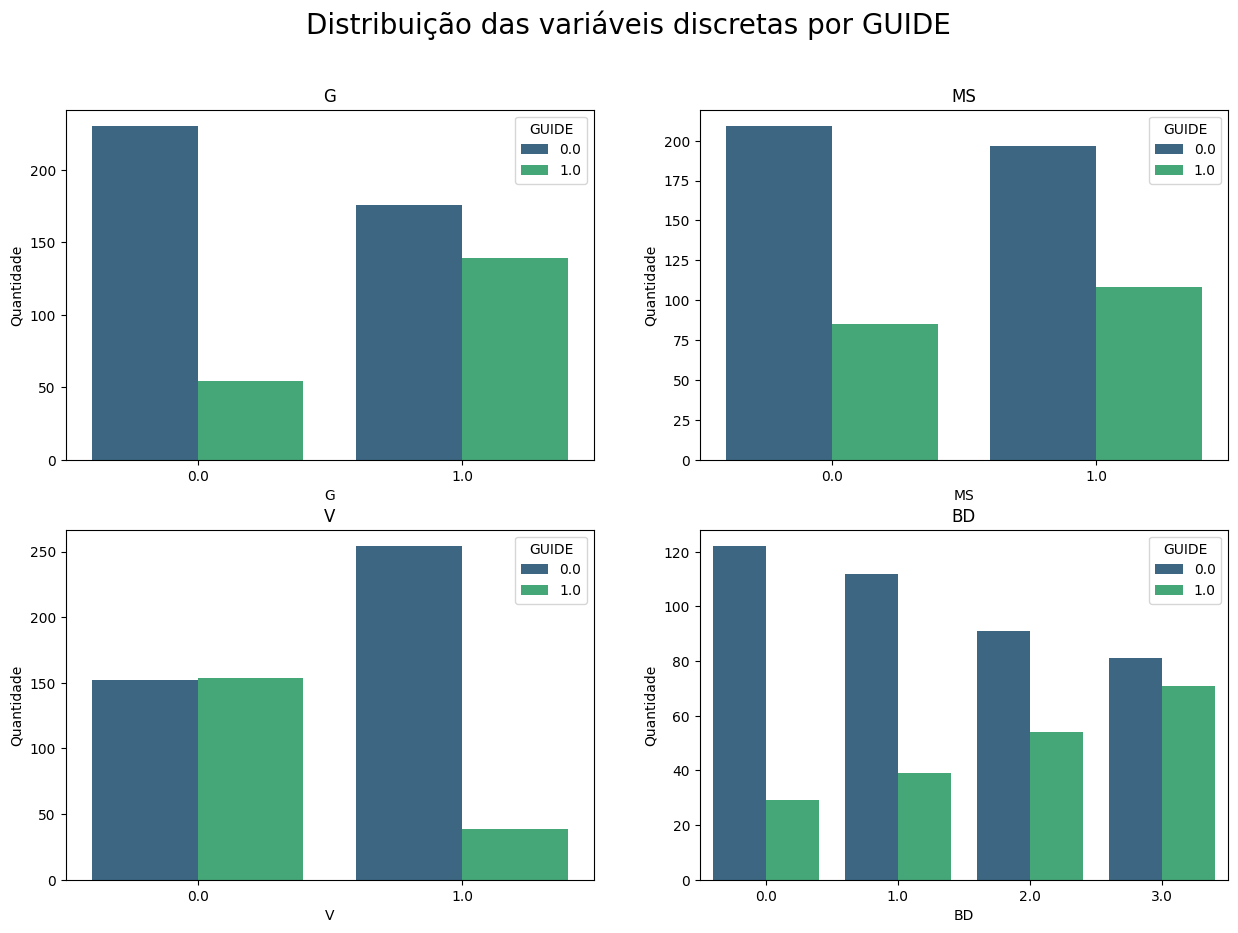

In [36]:
# distribuição das variáveis discretas por GUIDE
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribuição das variáveis discretas por GUIDE', fontsize=20)
for i, ax in enumerate(axs.flat):
    sns.countplot(x=discretas[i], hue='GUIDE', data=df, ax=ax, palette='viridis')
    ax.set_title(discretas[i])
    ax.set_xlabel(discretas[i])
    ax.set_ylabel('Quantidade')
plt.show()


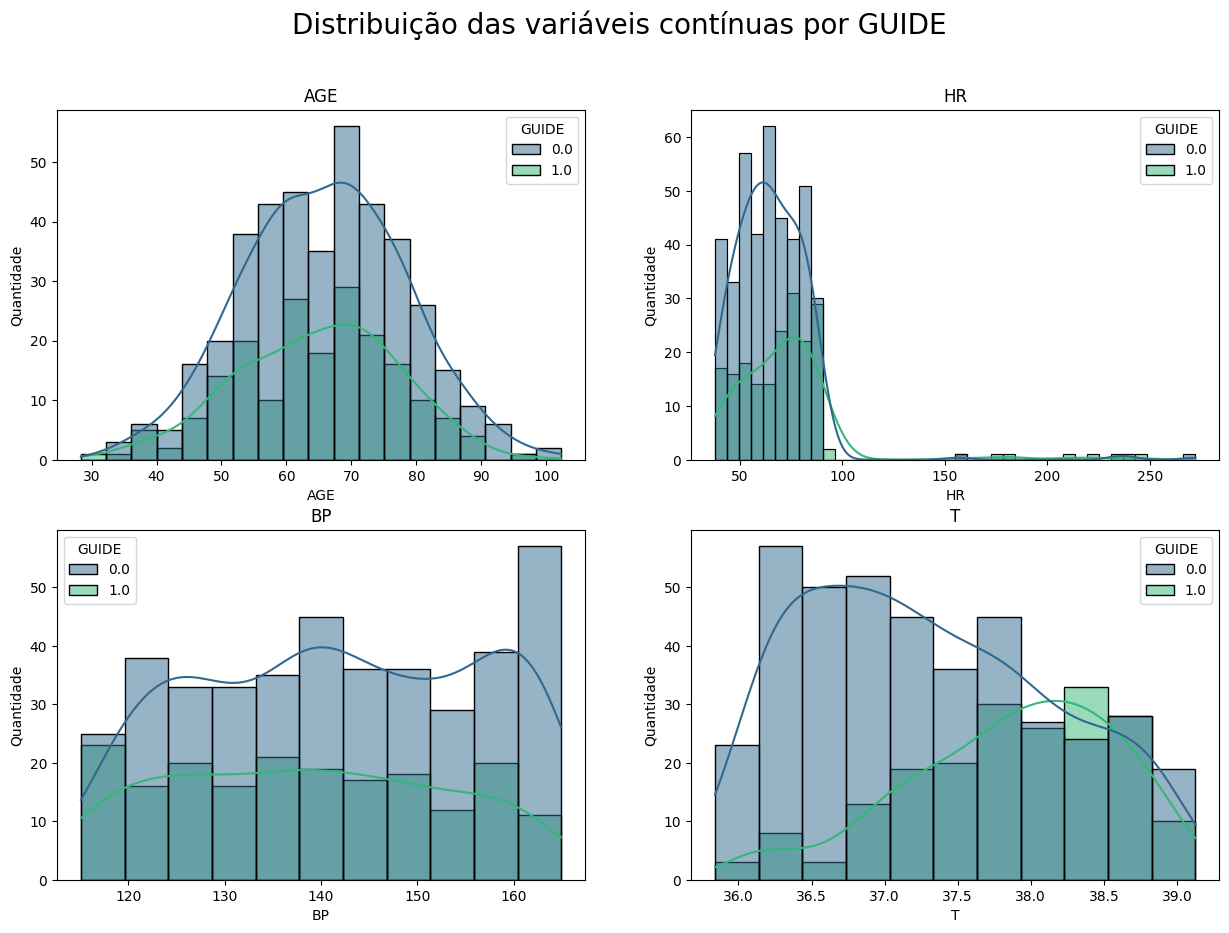

In [37]:
# Avaliar a distribuição das variáveis contínuas
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribuição das variáveis contínuas por GUIDE', fontsize=20)
for i, ax in enumerate(axs.flat):
    sns.histplot(x=continuas[i], hue='GUIDE', data=df, ax=ax, kde=True, palette='viridis')
    ax.set_title(continuas[i])
    ax.set_xlabel(continuas[i])
    ax.set_ylabel('Quantidade')

### Testes de Normalidade para verificar as variáveis que seguem distribuição normal e aferir se influenciam a probabilidade Condicional

Vamos usar Shapiro-Wilk, Q-Q plot e teste de Kolmogorov-Smirnov

Q-Q plot- compara a distribuição dos dados com uma distribuição normal(teórica):

* Forma da Linha Diagonal:

O Q-Q plot é plotado com os quantis observados (seus dados) no eixo vertical e os quantis esperados (distribuição teórica, como a normal) no eixo horizontal.
Se os pontos no gráfico se aproximam da linha diagonal (y = x), isso sugere que os dados têm uma distribuição semelhante à distribuição teórica.

* Desvios da Linha Diagonal:

Desvios significativos da linha diagonal podem indicar que seus dados não seguem a distribuição teórica. Por exemplo, se os pontos no Q-Q plot se desviam da linha diagonal de maneira sistemática (curvatura ou inclinação), isso sugere que a distribuição dos seus dados é diferente da distribuição normal.

* Outliers ou Pontos Extremos:

Outliers ou pontos extremos no Q-Q plot podem indicar a presença de valores atípicos (outliers) em seus dados. Esses valores podem afetar a interpretação da normalidade dos dados.

Variável: AGE
Teste de Shapiro-Wilk: ShapiroResult(statistic=0.9964236617088318, pvalue=0.19956514239311218)
Distribuição normal de acordo com Shapiro-Wilk
Teste de Kolmogorov-Smirnov: KstestResult(statistic=1.0, pvalue=0.0, statistic_location=26.0, statistic_sign=-1)
Distribuição não normal de acordo com Kolmogorov-Smirnov


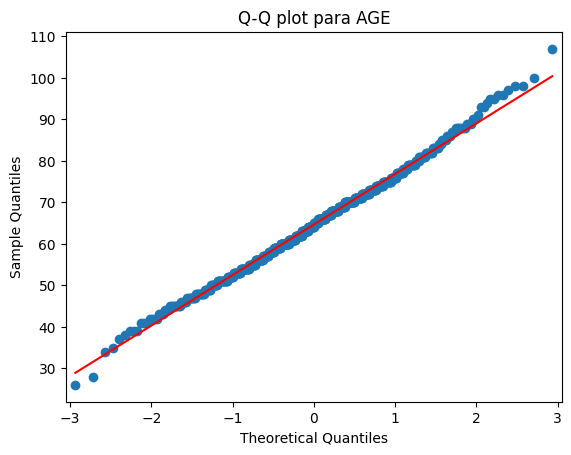

Variável: HR
Teste de Shapiro-Wilk: ShapiroResult(statistic=0.6776295900344849, pvalue=3.4891096789504064e-32)
Distribuição não normal de acordo com Shapiro-Wilk
Teste de Kolmogorov-Smirnov: KstestResult(statistic=1.0, pvalue=0.0, statistic_location=38.0, statistic_sign=-1)
Distribuição não normal de acordo com Kolmogorov-Smirnov


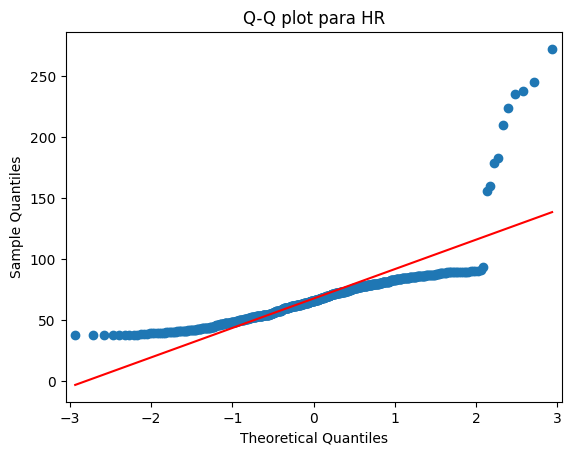

Variável: BP
Teste de Shapiro-Wilk: ShapiroResult(statistic=0.9532066583633423, pvalue=7.511991788160255e-13)
Distribuição não normal de acordo com Shapiro-Wilk
Teste de Kolmogorov-Smirnov: KstestResult(statistic=1.0, pvalue=0.0, statistic_location=115.09669, statistic_sign=-1)
Distribuição não normal de acordo com Kolmogorov-Smirnov


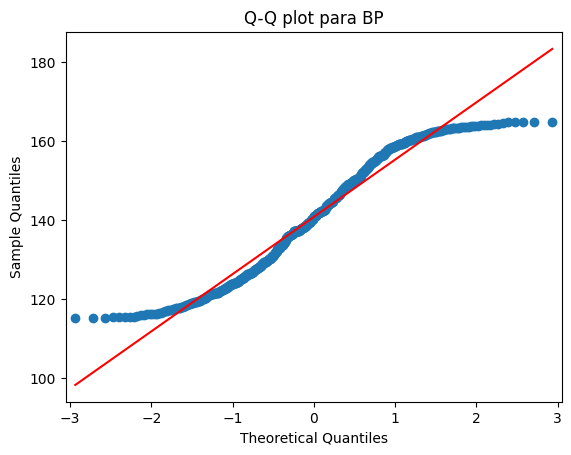

Variável: T
Teste de Shapiro-Wilk: ShapiroResult(statistic=0.966689944267273, pvalue=2.0436158321146536e-10)
Distribuição não normal de acordo com Shapiro-Wilk
Teste de Kolmogorov-Smirnov: KstestResult(statistic=1.0, pvalue=0.0, statistic_location=35.839809, statistic_sign=-1)
Distribuição não normal de acordo com Kolmogorov-Smirnov


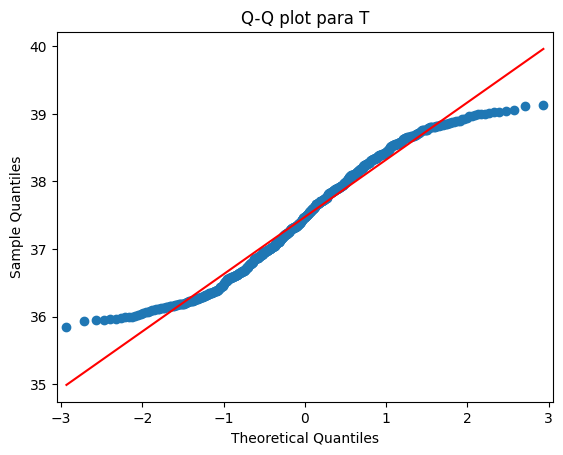

In [5]:
from scipy.stats import shapiro,kstest
from statsmodels.graphics.gofplots import qqplot

# fazer teste de Shapiro-Wilk, Q-Q plot e teste de Kolmogorov-Smirnov
for col in continuas:
    print(f'Variável: {col}')
    print(f'Teste de Shapiro-Wilk: {shapiro(df[col])}')
    if shapiro(df[col])[1] > 0.05:
        print('Distribuição normal de acordo com Shapiro-Wilk')
    else:
        print('Distribuição não normal de acordo com Shapiro-Wilk')
    print(f'Teste de Kolmogorov-Smirnov: {kstest(df[col], cdf="norm")}')
    if kstest(df[col], cdf="norm")[1] > 0.05:
        print('Distribuição normal de acordo com Kolmogorov-Smirnov')
    else:
        print('Distribuição não normal de acordo com Kolmogorov-Smirnov')
    qqplot(df[col], line='s')
    plt.title(f'Q-Q plot para {col}')
    plt.show()




Resultados:
* Ao visualizar o histograma, apenas a idade apresenta uma distribuição normal, e através dos testes realizados, apesar do teste Kolmogorov-Smirnov indicar o contrário, conseguimos confirmar o mesmo.

Criar bayesian model que tem em conta a features com distribuição normal e bayesian model que não tem isso em conta

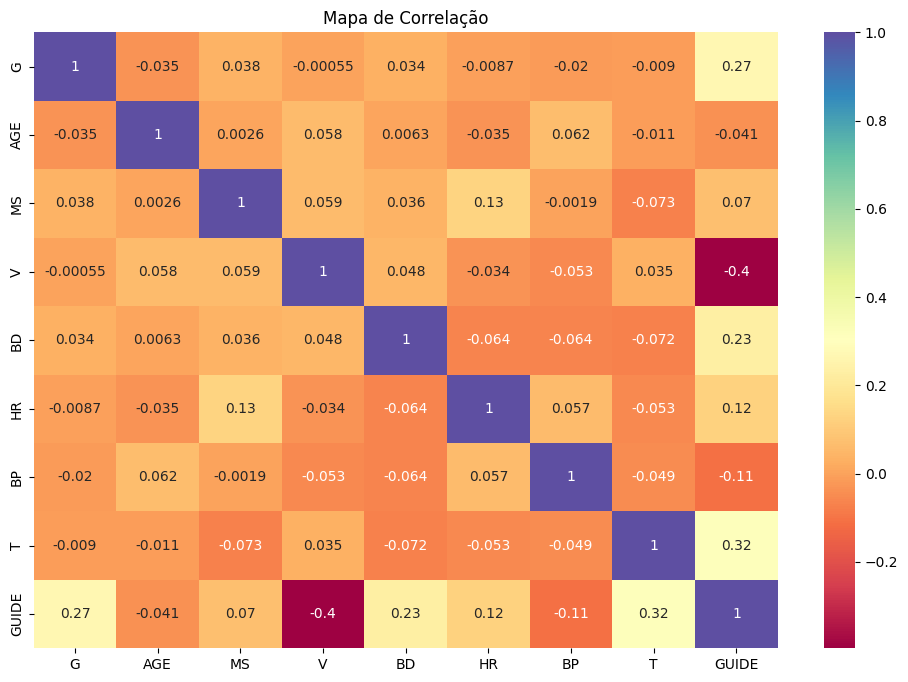

In [39]:
# Avaliar a correlação entre as variáveis
# Matriz de correlação
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Spectral')
plt.title('Mapa de Correlação')
plt.show()


* genero,vacina,bd e temperatura-> os que melhor se correlacionam com o target
* idade, marital status, heartrate e blood pressure-> os que menos se correlacionam com o target
* heart rate e marital status,as mais correlacionadas .> redundância, provavelmente n são necessárias as duas.

Usar esta informação nos testes de importância das features

Ver se alguma coluna contem valores em falta

In [40]:
nan_columns = df.columns[df.isnull().any()].tolist()
print("Colunas com valores Nan", nan_columns)

Colunas com valores Nan []


Vamos colocar como int valores que vem com casas decimais com zeros à direita, arredondar para 1 casa a idade, visto poder ser usada como int mas poder ter algum interesse tendo uma casa decimal para ter mais noção da idade da pessoa (sem casas decimais, alguém com 40 anos e 11 meses estaria mais longe de alguem com 41 anos certos do que de alguem com 40 anos certos, questão que eliminamos com a casa decimal), e arredondamos com 3 casas decimais as outras colunas com valores contínuos

In [41]:
for col in ['G', 'MS', 'V', 'BD', 'GUIDE']:
    df[col] = df[col].astype(int)

for col in ['HR', 'BP', 'T']:
    df[col] = np.round(df[col], 3)

for col in ['AGE']:
    df[col] = np.round(df[col], 1)
df.head()

,G,AGE,MS,V,BD,HR,BP,T,GUIDE
0,0,84.8,1,0,3,79.450,132.814,36.832,1
1,1,75.0,0,0,3,85.471,137.332,37.580,1
2,1,55.1,0,0,1,51.561,149.297,36.959,0
3,0,62.6,1,0,2,89.008,121.427,37.745,1
4,1,57.6,0,0,1,71.583,164.882,36.507,0


In [42]:
counts = df['GUIDE'].value_counts()
print(counts)


GUIDE
0    406
1    193
Name: count, dtype: int64


Segundo os clinical guidelines, 406 pessoas iriam para casa e 193 iriam ficar no hospital

## II. Implementação do modelo de Classificação

* 1. Tendo em conta normalidade da distribuição- de acordo com suposição de normalidade -> de acordo com testes de normalidade apenas age é gaussiana
* 2. Não tendo em conta testes de normalidade:
    * todas as variáveis discretizadas
    * todas as variáveis tratadas como gaussianas
    

### II.a Performance do classificador 
* Modelo 1- trata a variável 'age' como Gaussiana e lida com outras variáveis contínuas de forma adequada (discretizando-as).
* Modelo 2- trata todas as variáveis contínuas da mesma forma-> discretiza-as.
* Modelo 3 - trata todas as variáveis contínuas como gaussianas.

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dividir os dados em treino e teste
X = df.drop('GUIDE', axis=1)
y = df['GUIDE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
# Definir as colunas
discrete_cols = ['G', 'MS', 'V', 'BD']
continuous_normal_cols = ['AGE']
continuous_non_normal_cols = ['T', 'HR', 'BP']
continuous_cols = continuous_normal_cols + continuous_non_normal_cols

In [45]:
class CustomBayesClassifier:
    def __init__(self, discrete_cols, continuous_normal_cols, continuous_non_normal_cols, num_bins=15):
        self.class_priors = {}
        self.feature_params = {}
        self.label_encoders = {}
        self.discrete_cols = discrete_cols
        self.continuous_normal_cols = continuous_normal_cols
        self.continuous_non_normal_cols = continuous_non_normal_cols
        self.num_bins = num_bins

    def fit(self, X, y):
        #priors
        unique_classes, class_counts = np.unique(y, return_counts=True)
        self.class_priors = {c: count / len(y) for c, count in zip(unique_classes, class_counts)}

        # Separate features by class
        self.feature_params = {c: {} for c in unique_classes}
        for c in unique_classes:
            X_c = X[y == c]
            for col in X.columns:
                if self.discrete_cols is not None and col in self.discrete_cols:
                    # Discrete 
                    values, counts = np.unique(X_c[col], return_counts=True)
                    self.feature_params[c][col] = {'values': values, 'counts': counts / len(X_c)}
                elif self.continuous_normal_cols is not None and col in self.continuous_normal_cols:
                    # Continuous - Gausssian assumption
                    mean = X_c[col].mean()
                    var = X_c[col].var()
                    self.feature_params[c][col] = {'mean': mean, 'var': var}
                elif self.continuous_non_normal_cols is not None and col in self.continuous_non_normal_cols:
                    # Discretize continuous feature
                    bins = np.linspace(X[col].min(), X[col].max(), self.num_bins + 1)
                    digitized = np.digitize(X_c[col], bins) - 1
                    values, counts = np.unique(digitized, return_counts=True)
                    self.feature_params[c][col] = {'values': values, 'counts': counts / len(X_c), 'bins': bins}

    def _calculate_likelihood(self, x, class_label):
        likelihood = 1
        for col in x.index:
            if self.discrete_cols is not None and col in self.discrete_cols:
                # Discrete
                values = self.feature_params[class_label][col]['values']
                counts = self.feature_params[class_label][col]['counts']
                if x[col] in values:
                    likelihood *= counts[np.where(values == x[col])[0][0]]
                else:
                    alpha = 0.01  # Valor de suavização
                    likelihood *= alpha  # Lidstone smoothing  # Smoothing for unseen values
            elif self.continuous_normal_cols is not None and col in self.continuous_normal_cols:
                # Continuous feature with Gaussian assumption
                mean = self.feature_params[class_label][col]['mean']
                var = self.feature_params[class_label][col]['var']
                # Gaussian probability density function
                numerator = np.exp(-((x[col] - mean) ** 2) / (2 * var))
                denominator = np.sqrt(2 * np.pi * var)
                likelihood *= numerator / denominator
            elif self.continuous_non_normal_cols is not None and col in self.continuous_non_normal_cols:
                # Discretized continuous feature
                bins = self.feature_params[class_label][col]['bins']
                digitized = np.digitize([x[col]], bins) - 1
                values = self.feature_params[class_label][col]['values']
                counts = self.feature_params[class_label][col]['counts']
                if digitized[0] in values:
                    likelihood *= counts[np.where(values == digitized[0])[0][0]]
                else:
                    alpha = 0.01  # Valor de suavização
                    likelihood *= alpha  # Lidstone smoothing
        return likelihood

    def predict(self, X):
        predictions = []
        for _, x in X.iterrows():
            posteriors = {}
            for c in self.class_priors:
                prior = self.class_priors[c]
                likelihood = self._calculate_likelihood(x, c)
                posteriors[c] = prior * likelihood
            predictions.append(max(posteriors, key=posteriors.get))
        return np.array(predictions)


Modelo 1

In [46]:
model1 = CustomBayesClassifier(discrete_cols, continuous_normal_cols, continuous_non_normal_cols)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

# Avaliar performance
def evaluate_model(y_true, y_pred):
    print(f'Accuracy: {accuracy_score(y_true, y_pred)}')
    print(f'Precision: {precision_score(y_true, y_pred)}')
    print(f'Recall: {recall_score(y_true, y_pred)}')
    print(f'F1 Score: {f1_score(y_true, y_pred)}')

print("Modelo 1:")
evaluate_model(y_test, y_pred1)

Modelo 1:
Accuracy: 0.8333333333333334
Precision: 0.8
Recall: 0.6666666666666666
F1 Score: 0.7272727272727272


Modelo 2

In [47]:
class GeneralHybridBayesClassifier(CustomBayesClassifier):
    def __init__(self, discrete_cols, continuous_cols, num_bins=10):
        super().__init__(discrete_cols, None, continuous_cols, num_bins)

    def fit(self, X, y):
        super().fit(X, y)


In [48]:
model2 = GeneralHybridBayesClassifier(discrete_cols, continuous_cols)
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

# Avaliar performance
def evaluate_model(y_true, y_pred):
    print(f'Accuracy: {accuracy_score(y_true, y_pred)}')
    print(f'Precision: {precision_score(y_true, y_pred)}')
    print(f'Recall: {recall_score(y_true, y_pred)}')
    print(f'F1 Score: {f1_score(y_true, y_pred)}')


print("Modelo 2:")
evaluate_model(y_test, y_pred2)

Modelo 2:
Accuracy: 0.7611111111111111
Precision: 0.673469387755102
Recall: 0.55
F1 Score: 0.6055045871559633


Modelo 3

In [49]:
# Treinamento e avaliação do modelo
model_3 = CustomBayesClassifier(discrete_cols, continuous_cols, None)
model_3.fit(X_train, y_train)
y_pred3 = model_3.predict(X_test)

# Avaliar performance
def evaluate_model(y_true, y_pred):
    print(f'Accuracy: {accuracy_score(y_true, y_pred)}')
    print(f'Precision: {precision_score(y_true, y_pred)}')
    print(f'Recall: {recall_score(y_true, y_pred)}')
    print(f'F1 Score: {f1_score(y_true, y_pred)}')

print("Performance do Modelo 3:")
evaluate_model(y_test, y_pred3)


Performance do Modelo 3:
Accuracy: 0.8333333333333334
Precision: 0.8571428571428571
Recall: 0.6
F1 Score: 0.7058823529411764


#### Resultados:

C:\Users\diana\AppData\Local\Temp\ipykernel_10832\3616417481.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Modelo 1', 'Modelo 2','Modelo3'], y=[accuracy_score(y_test, y_pred1), accuracy_score(y_test, y_pred2), accuracy_score(y_test, y_pred3)], palette='viridis')


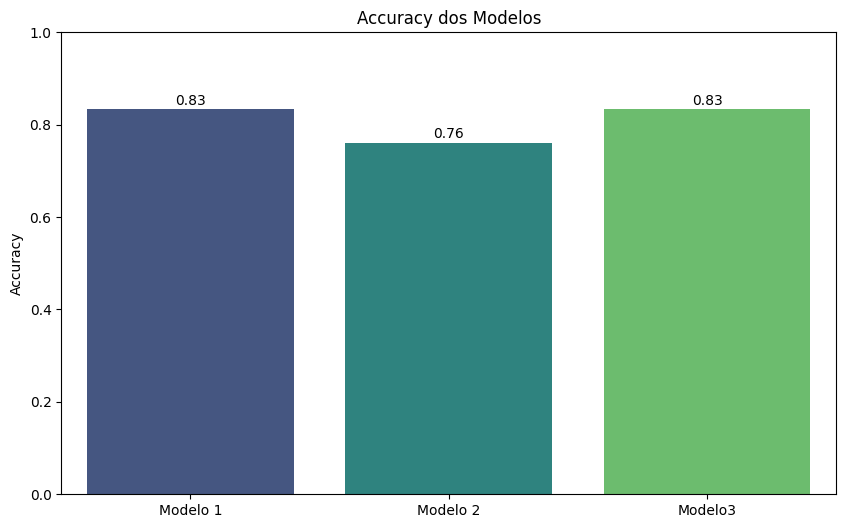

In [50]:
# plotar accuracy modelo1 vs modelo2
# paleta viridis
plt.figure(figsize=(10, 6))
sns.barplot(x=['Modelo 1', 'Modelo 2','Modelo3'], y=[accuracy_score(y_test, y_pred1), accuracy_score(y_test, y_pred2), accuracy_score(y_test, y_pred3)], palette='viridis')
plt.title('Accuracy dos Modelos')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate([accuracy_score(y_test, y_pred1), accuracy_score(y_test, y_pred2), accuracy_score(y_test, y_pred3)]):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')
plt.show()

C:\Users\diana\AppData\Local\Temp\ipykernel_10832\3035358712.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Modelo 1', 'Modelo 2','Modelo3'], y=[recall_score(y_test, y_pred1), recall_score(y_test, y_pred2), recall_score(y_test, y_pred3)], palette='viridis')


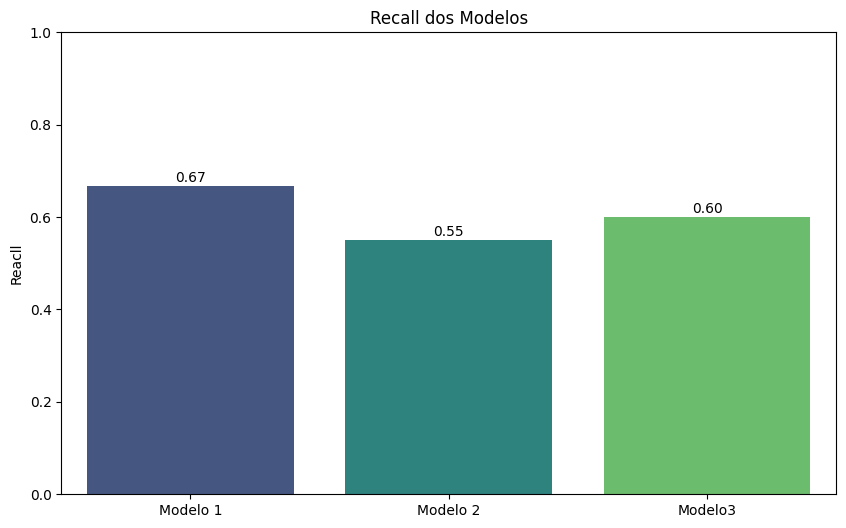

In [51]:
# plotar recall  modelo1 vs modelo2 vs Modeo3
# paleta viridis
plt.figure(figsize=(10, 6))
sns.barplot(x=['Modelo 1', 'Modelo 2','Modelo3'], y=[recall_score(y_test, y_pred1), recall_score(y_test, y_pred2), recall_score(y_test, y_pred3)], palette='viridis')
plt.title('Recall dos Modelos')
plt.ylabel('Reacll')
plt.ylim(0, 1)
for i, v in enumerate([recall_score(y_test, y_pred1), recall_score(y_test, y_pred2), recall_score(y_test, y_pred3)]):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')
plt.show()

### II.b Testar importância das variáveis (usar ou não todas) - tirar as com menos correlação com target

Initial Model Performance:
Accuracy: 0.8333333333333334
Precision: 0.8
Recall: 0.6666666666666666
F1 Score: 0.7272727272727272
Evaluating model without column: G
Evaluating model without column: MS
Evaluating model without column: V
Evaluating model without column: BD
Evaluating model without column: AGE
Evaluating model without column: T
Evaluating model without column: HR
Evaluating model without column: BP
Ablation Study Results:
Without column G:
  Accuracy: 0.7833333333333333
  Precision: 0.7058823529411765
  Recall: 0.6
  F1: 0.6486486486486486
Without column MS:
  Accuracy: 0.8277777777777777
  Precision: 0.7959183673469388
  Recall: 0.65
  F1: 0.7155963302752293
Without column V:
  Accuracy: 0.7444444444444445
  Precision: 0.675
  Recall: 0.45
  F1: 0.54
Without column BD:
  Accuracy: 0.7888888888888889
  Precision: 0.7291666666666666
  Recall: 0.5833333333333334
  F1: 0.6481481481481481
Without column AGE:
  Accuracy: 0.8333333333333334
  Precision: 0.8
  Recall: 0.66666666666

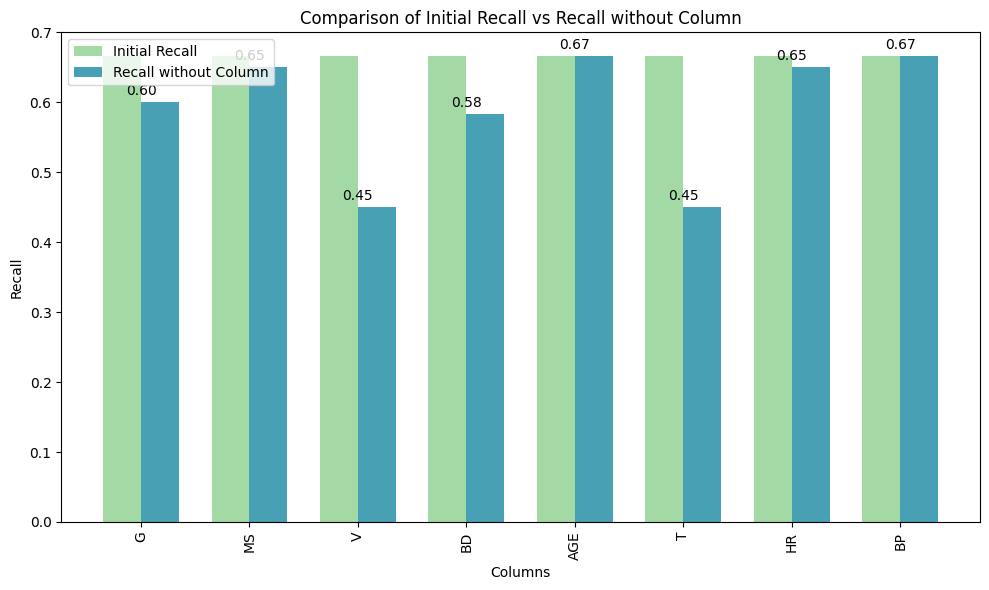

In [52]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

def ablation_study(model_class, X_train, y_train, X_test, y_test, discrete_cols, continuous_normal_cols, continuous_non_normal_cols):
    results = {}
    
    all_columns = discrete_cols + continuous_normal_cols + continuous_non_normal_cols

    for col in all_columns:
        print(f"Evaluating model without column: {col}")

        new_discrete_cols = [c for c in discrete_cols if c != col]
        new_continuous_normal_cols = [c for c in continuous_normal_cols if c != col]
        new_continuous_non_normal_cols = [c for c in continuous_non_normal_cols if c != col]
        
        model = model_class(new_discrete_cols, new_continuous_normal_cols, new_continuous_non_normal_cols)
        model.fit(X_train.drop(columns=[col]), y_train)
        
        y_pred = model.predict(X_test.drop(columns=[col]))
        accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)
        
        results[col] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1
        }
    return results

#_____________Para modelo1_______________


model1 = CustomBayesClassifier(discrete_cols, continuous_normal_cols, continuous_non_normal_cols)
model1.fit(X_train, y_train)

# Avaliação do modelo inicial
y_pred1 = model1.predict(X_test)
initial_performance = evaluate_model(y_test, y_pred1)
print("Initial Model Performance:")
print(f'Accuracy: {initial_performance[0]}')
print(f'Precision: {initial_performance[1]}')
print(f'Recall: {initial_performance[2]}')
print(f'F1 Score: {initial_performance[3]}')

# Análise de Ablação
ablation_results = ablation_study(CustomBayesClassifier, X_train, y_train, X_test, y_test, discrete_cols, continuous_normal_cols, continuous_non_normal_cols)
print("Ablation Study Results:")
for col, metrics in ablation_results.items():
    print(f"Without column {col}:")
    print(f"  Accuracy: {metrics['accuracy']}")
    print(f"  Precision: {metrics['precision']}")
    print(f"  Recall: {metrics['recall']}")
    print(f"  F1: {metrics['f1']}")

# Plotar gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

columns = list(ablation_results.keys())
recall_values = [result['recall'] for result in ablation_results.values()]

x = np.arange(len(columns))
width = 0.35

pastel_palette = sns.color_palette("Spectral")
rects1 = ax.bar(x - width/2, [initial_performance[2]] * len(columns), width, label='Initial Recall', color=pastel_palette[4])
rects2 = ax.bar(x + width/2, recall_values, width, label='Recall without Column', color=pastel_palette[5])

ax.set_xlabel('Columns')
ax.set_ylabel('Recall')
ax.set_title('Comparison of Initial Recall vs Recall without Column')
ax.set_xticks(x)

# colocar percentagens nos topos das barras
for i, v in enumerate(recall_values):
    ax.text(i, v + 0.01, f'{v:.2f}', ha='center')

ax.set_xticklabels(columns, rotation='vertical')
ax.legend()

plt.tight_layout()
plt.show()


1. Initial Model Performance:
* Accuracy: 0.8333333333333334
* Precision: 0.8
* Recall: 0.6666666666666666
* F1 Score: 0.7272727272727272


2. Ablation Study Results:
* Without column G:
  Accuracy: 0.7722222222222223
  Precision: 0.6727272727272727
  Recall: 0.6166666666666667
  F1: 0.6434782608695652
* Without column MS:
  Accuracy: 0.8222222222222222
  Precision: 0.78
  Recall: 0.65
  F1: 0.709090909090909
* Without column V:
  Accuracy: 0.7388888888888889
  Precision: 0.6666666666666666
  Recall: 0.43333333333333335
  F1: 0.5252525252525252
* Without column BD:
  Accuracy: 0.8
  Precision: 0.74
  Recall: 0.6166666666666667
  F1: 0.6727272727272727
* Without column AGE:
  Accuracy: 0.8333333333333334
  Precision: 0.8
  Recall: 0.6666666666666666
  F1: 0.7272727272727272
* Without column T:
  Accuracy: 0.7722222222222223
  Precision: 0.7317073170731707
  Recall: 0.5
  F1: 0.594059405940594
* Without column HR:
  Accuracy: 0.7888888888888889
  Precision: 0.6896551724137931
  Recall: 0.6666666666666666
  F1: 0.6779661016949153
* Without column BP:
  Accuracy: 0.85
  Precision: 0.8113207547169812
  Recall: 0.7166666666666667
  F1: 0.7610619469026548

Comparando com os resultados de correlação com o target --> faz senrtido
Explicar melhor falando que faz por exemplo resultado da vacinação faz sentido no ponto de vista clinico, etc...

Resultados antigo da correlação:
* genero,vacina,bd e temperatura-> os que melhor se correlacionam com o target
* idade, marital status, heartrate e blood pressure-> os que menos se correlacionam com o target

Initial Model Performance:
Accuracy: 0.7611111111111111
Precision: 0.673469387755102
Recall: 0.55
F1 Score: 0.6055045871559633
Evaluating model without column: G
Evaluating model without column: MS
Evaluating model without column: V
Evaluating model without column: BD
Evaluating model without column: AGE
Evaluating model without column: T
Evaluating model without column: HR
Evaluating model without column: BP
Ablation Study Results:
Without column G:
  Accuracy: 0.7611111111111111
  Precision: 0.6888888888888889
  Recall: 0.5166666666666667
  F1: 0.5904761904761905
Without column MS:
  Accuracy: 0.7666666666666667
  Precision: 0.6875
  Recall: 0.55
  F1: 0.6111111111111112
Without column V:
  Accuracy: 0.7
  Precision: 0.5833333333333334
  Recall: 0.35
  F1: 0.4375
Without column BD:
  Accuracy: 0.7722222222222223
  Precision: 0.6862745098039216
  Recall: 0.5833333333333334
  F1: 0.6306306306306307
Without column AGE:
  Accuracy: 0.7833333333333333
  Precision: 0.723404255319149
  Reca

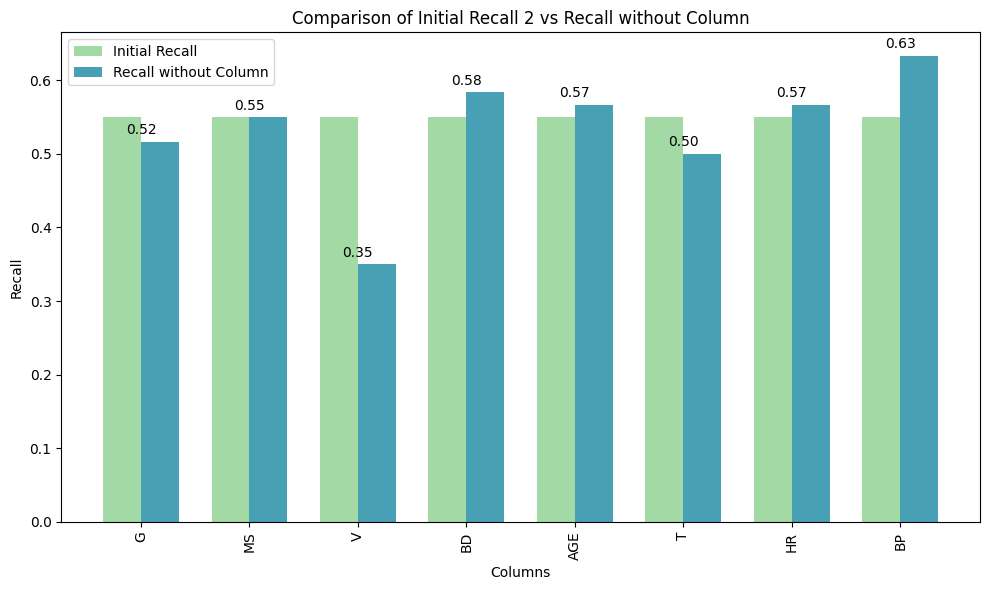

In [53]:
#_____________Para modelo2_______________

def ablation_study2(model_class, X_train, y_train, X_test, y_test, discrete_cols, continuous_cols):
    results = {}
    
    all_columns = discrete_cols + continuous_cols

    for col in all_columns:
        print(f"Evaluating model without column: {col}")

        new_discrete_cols = [c for c in discrete_cols if c != col]
        new_continuous_cols = [c for c in continuous_cols if c != col]
        
        
        model = model_class(new_discrete_cols, new_continuous_cols)
        model.fit(X_train.drop(columns=[col]), y_train)
        
        y_pred = model.predict(X_test.drop(columns=[col]))
        accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)
        
        results[col] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1
        }
    return results



model2 = GeneralHybridBayesClassifier(discrete_cols, continuous_cols)
model2.fit(X_train, y_train)

# Avaliação do modelo 2
y_pred2 = model2.predict(X_test)
initial_performance = evaluate_model(y_test, y_pred2)
print("Initial Model Performance:")
print(f'Accuracy: {initial_performance[0]}')
print(f'Precision: {initial_performance[1]}')
print(f'Recall: {initial_performance[2]}')
print(f'F1 Score: {initial_performance[3]}')

# Análise de Ablação
ablation_results2 = ablation_study2(GeneralHybridBayesClassifier, X_train, y_train, X_test, y_test, discrete_cols, continuous_cols)

print("Ablation Study Results:")
for col, metrics in ablation_results2.items():
    print(f"Without column {col}:")
    print(f"  Accuracy: {metrics['accuracy']}")
    print(f"  Precision: {metrics['precision']}")
    print(f"  Recall: {metrics['recall']}")
    print(f"  F1: {metrics['f1']}")

# Plotar gráfico de barras

fig, ax = plt.subplots(figsize=(10, 6))

columns = list(ablation_results2.keys())
recall_values = [result['recall'] for result in ablation_results2.values()]

x = np.arange(len(columns))
width = 0.35

pastel_palette = sns.color_palette("Spectral")
rects1 = ax.bar(x - width/2, [initial_performance[2]] * len(columns), width, label='Initial Recall', color=pastel_palette[4])
rects2 = ax.bar(x + width/2, recall_values, width, label='Recall without Column', color=pastel_palette[5])

ax.set_xlabel('Columns')
ax.set_ylabel('Recall')
ax.set_title('Comparison of Initial Recall 2 vs Recall without Column')
ax.set_xticks(x)

# colocar percentagens nos topos das barras

for i, v in enumerate(accuracy_values):
    ax.text(i, v + 0.01, f'{v:.2f}', ha='center')

ax.set_xticklabels(columns, rotation='vertical')
ax.legend()

plt.tight_layout()
plt.show()

* Initial Model Performance:
Accuracy: 0.7611111111111111
Precision: 0.673469387755102
Recall: 0.55
F1 Score: 0.6055045871559633

Ablation Study Results:
* Without column G:
  Accuracy: 0.7722222222222223
  Precision: 0.7111111111111111
  Recall: 0.5333333333333333
  F1: 0.6095238095238096
* Without column MS:
  Accuracy: 0.7611111111111111
  Precision: 0.6976744186046512
  Recall: 0.5
  F1: 0.5825242718446603
* Without column V:
  Accuracy: 0.6833333333333333
  Precision: 0.5428571428571428
  Recall: 0.31666666666666665
  F1: 0.4
* Without column BD:
  Accuracy: 0.7388888888888889
  Precision: 0.6382978723404256
  Recall: 0.5
  F1: 0.5607476635514019
* Without column AGE:
  Accuracy: 0.7833333333333333
  Precision: 0.723404255319149
  Recall: 0.5666666666666667
  F1: 0.6355140186915887
* Without column T:
  Accuracy: 0.7611111111111111
  Precision: 0.7297297297297297
  Recall: 0.45
  F1: 0.556701030927835
* Without column HR:
  Accuracy: 0.75
  Precision: 0.6530612244897959
  Recall: 0.5333333333333333
  F1: 0.5871559633027523
+ Without column BP:
  Accuracy: 0.7833333333333333
  Precision: 0.723404255319149
  Recall: 0.5666666666666667
  F1: 0.6355140186915887



Comparando com os resultados de correlação com o target --> faz senrtido
Explicar melhor falando que faz por exemplo resultado da vacinação faz sentido no ponto de vista clinico, etc...

Resultados antigo da correlação:
* genero,vacina,bd e temperatura-> os que melhor se correlacionam com o target
* idade, marital status, heartrate e blood pressure-> os que menos se correlacionam com o target

Performance do Modelo 3:
Accuracy: 0.8333333333333334
Precision: 0.8416149068322981
Recall: 0.7749999999999999
F1 Score: 0.7948016415868673
Evaluating model without column: G
Evaluating model without column: MS
Evaluating model without column: V
Evaluating model without column: BD
Evaluating model without column: AGE
Evaluating model without column: T
Evaluating model without column: HR
Evaluating model without column: BP
Ablation Study Results for Model 3:
Without column G:
  Accuracy: 0.7833333333333333
  Precision: 0.7599179206566348
  Recall: 0.7375
  F1: 0.7460110713122761
Without column MS:
  Accuracy: 0.8277777777777777
  Precision: 0.8178065119177442
  Recall: 0.7833333333333333
  F1: 0.7960451770898058
Without column V:
  Accuracy: 0.7444444444444445
  Precision: 0.7196428571428571
  Recall: 0.6708333333333334
  F1: 0.6815384615384616
Without column BD:
  Accuracy: 0.7888888888888889
  Precision: 0.7698863636363635
  Recall: 0.7375
  F1: 0.7486772486772487
Without column AGE:


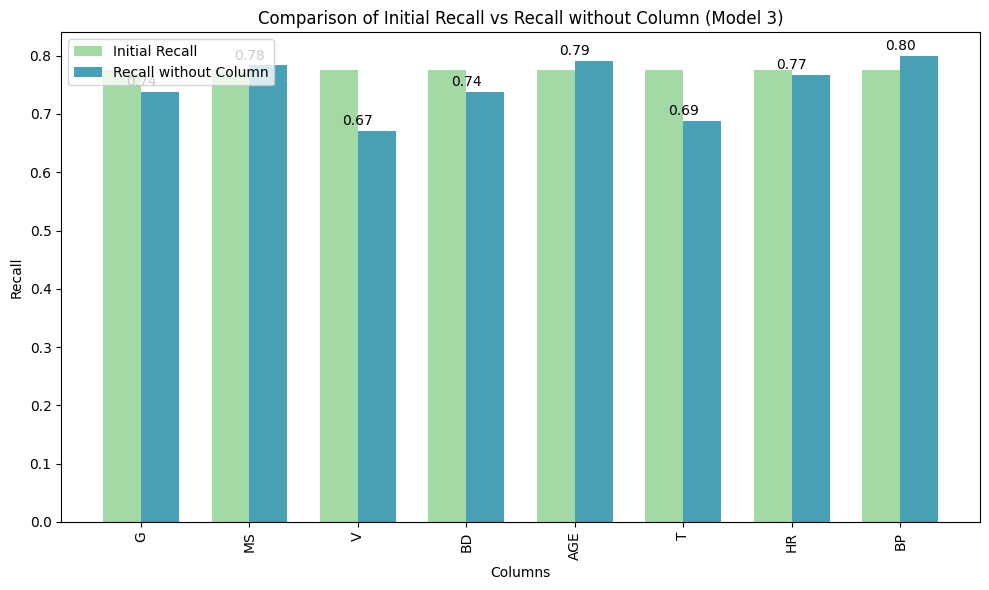

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Função de avaliação do modelo
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    return accuracy, precision, recall, f1

# Função de estudo de ablação
def ablation_study(model_class, X_train, y_train, X_test, y_test, discrete_cols, continuous_normal_cols, continuous_non_normal_cols):
    results = {}
    
    all_columns = discrete_cols + continuous_normal_cols + continuous_non_normal_cols

    for col in all_columns:
        print(f"Evaluating model without column: {col}")

        new_discrete_cols = [c for c in discrete_cols if c != col]
        new_continuous_normal_cols = [c for c in continuous_normal_cols if c != col]
        new_continuous_non_normal_cols = [c for c in continuous_non_normal_cols if c != col]
        
        model = model_class(new_discrete_cols, new_continuous_normal_cols, new_continuous_non_normal_cols)
        model.fit(X_train.drop(columns=[col]), y_train)
        
        y_pred = model.predict(X_test.drop(columns=[col]))
        accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)
        
        results[col] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1
        }
    return results


# Treinamento e avaliação do modelo 3
model_3 = CustomBayesClassifier(discrete_cols, continuous_cols, None)
model_3.fit(X_train, y_train)
y_pred3 = model_3.predict(X_test)

# Avaliar performance do modelo 3
print("Performance do Modelo 3:")
accuracy_model3, precision_model3, recall_model3, f1_model3 = evaluate_model(y_test, y_pred3)
print(f'Accuracy: {accuracy_model3}')
print(f'Precision: {precision_model3}')
print(f'Recall: {recall_model3}')
print(f'F1 Score: {f1_model3}')

# Análise de Ablação para o Modelo 3
ablation_results = ablation_study(CustomBayesClassifier, X_train, y_train, X_test, y_test, discrete_cols, continuous_normal_cols, continuous_non_normal_cols)
print("Ablation Study Results for Model 3:")
for col, metrics in ablation_results.items():
    print(f"Without column {col}:")
    print(f"  Accuracy: {metrics['accuracy']}")
    print(f"  Precision: {metrics['precision']}")
    print(f"  Recall: {metrics['recall']}")
    print(f"  F1: {metrics['f1']}")

# Plotar gráfico de barras para comparar as acurácias
fig, ax = plt.subplots(figsize=(10, 6))

columns = list(ablation_results.keys())
recall_values = [result['recall'] for result in ablation_results.values()]

x = np.arange(len(columns))
width = 0.35

pastel_palette = sns.color_palette("Spectral")
rects1 = ax.bar(x - width/2, [recall_model3] * len(columns), width, label='Initial Recall', color=pastel_palette[4])
rects2 = ax.bar(x + width/2, recall_values, width, label='Recall without Column', color=pastel_palette[5])

ax.set_xlabel('Columns')
ax.set_ylabel('Recall')
ax.set_title('Comparison of Initial Recall vs Recall without Column (Model 3)')
ax.set_xticks(x)

# colocar percentagens nos topos das barras
for i, v in enumerate(recall_values):
    ax.text(i, v + 0.01, f'{v:.2f}', ha='center')

ax.set_xticklabels(columns, rotation='vertical')
ax.legend()

plt.tight_layout()
plt.show()


* Performance do Modelo 3:
Accuracy: 0.8166666666666667
Precision: 0.8111111111111111
Recall: 0.7625
F1 Score: 0.7781512605042017

* Without column G:
  Accuracy: 0.7722222222222223
  Precision: 0.7443636363636363
  Recall: 0.7333333333333334
  F1: 0.7380656610470274
* Without column MS:
  Accuracy: 0.8222222222222222
  Precision: 0.8092307692307692
  Recall: 0.7791666666666667
  F1: 0.7905454545454544
* Without column V:
  Accuracy: 0.7388888888888889
  Precision: 0.7127659574468085
  Recall: 0.6625000000000001
  F1: 0.6725879484500173
* Without column BD:
  Accuracy: 0.8
  Precision: 0.7815384615384615
  Recall: 0.7541666666666667
  F1: 0.7643636363636364
* Without column AGE:
  Accuracy: 0.8333333333333334
  Precision: 0.823076923076923
  Recall: 0.7916666666666666
  F1: 0.8036363636363635
* Without column T:
  Accuracy: 0.7722222222222223
  Precision: 0.7579399894718372
  Recall: 0.7041666666666666
  F1: 0.717879123819718
* Without column HR:
  Accuracy: 0.7888888888888889
  Precision: 0.7628603730921425
  Recall: 0.7583333333333333
  F1: 0.7604706541532429
* Without column BP:
  Accuracy: 0.85
  Precision: 0.8387312435002229
  Recall: 0.8166666666666667
  F1: 0.8258751030059832


### II.c Variáveis contínuas vs. Discretas

Accuracy Inicial: 0.8333333333333334
Performance usando apenas variáveis discretas:
Accuracy: 0.8055555555555556
Precision: 0.8571428571428571
Recall: 0.5
F1 Score: 0.631578947368421
None
Performance usando apenas variáveis contínuas:
Accuracy: 0.6388888888888888
Precision: 0.42857142857142855
Recall: 0.25
F1 Score: 0.3157894736842105
None
Performance usando apenas variáveis contínuas modelo 2:
Accuracy: 0.6166666666666667
Precision: 0.38461538461538464
Recall: 0.25
F1 Score: 0.30303030303030304
None
Performance usando apenas variáveis contínuas modelo 2:
Accuracy: 0.6611111111111111
Precision: 0.48148148148148145
Recall: 0.21666666666666667
F1 Score: 0.29885057471264365
None


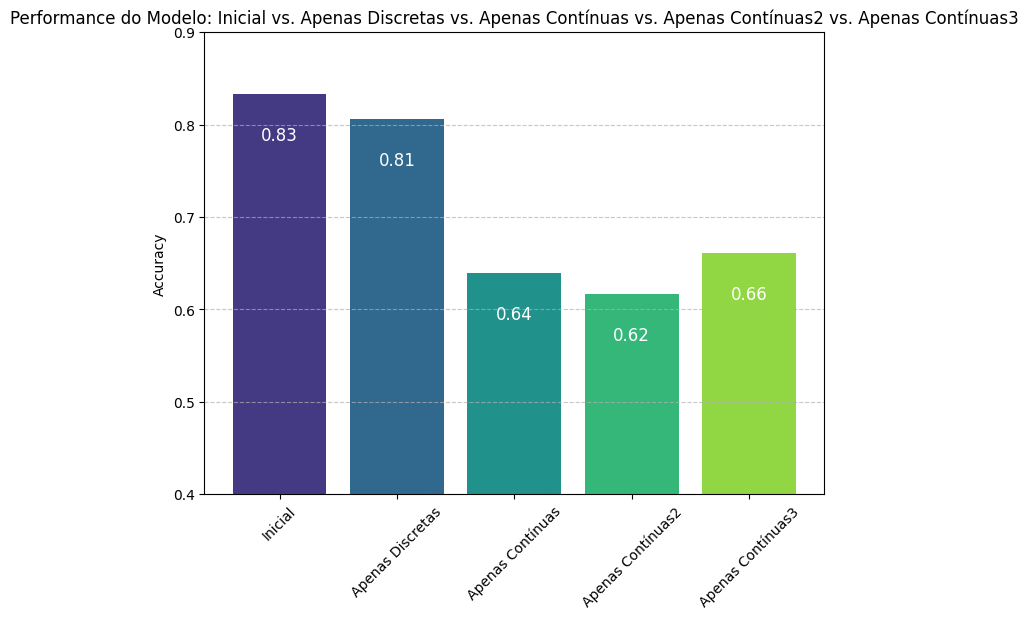

In [55]:
# Avaliação do modelo inicial
initial_performance = evaluate_model(y_test, y_pred1)
if initial_performance is not None:
    accuracy_inicial = initial_performance[0]
    print(f'Accuracy Inicial: {accuracy_inicial}')
else:
    print('Erro: Initial performance retornou None.')

def evaluate_model(y_true, y_pred):
    print(f'Accuracy: {accuracy_score(y_true, y_pred)}')
    print(f'Precision: {precision_score(y_true, y_pred)}')
    print(f'Recall: {recall_score(y_true, y_pred)}')
    print(f'F1 Score: {f1_score(y_true, y_pred)}')

# Performance usando apenas variáveis discretas
model3 = CustomBayesClassifier(discrete_cols, None, None)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print("Performance usando apenas variáveis discretas:")
print(evaluate_model(y_test, y_pred3))
accuracy_discrete = accuracy_score(y_test, y_pred3)

# Performance usando apenas variáveis contínuas
model4 = CustomBayesClassifier(None, continuous_normal_cols, continuous_non_normal_cols)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print("Performance usando apenas variáveis contínuas:",)
print(evaluate_model(y_test, y_pred4))
accuracy_continuous = accuracy_score(y_test, y_pred4)

# Performance usando apenas variáveis contínuas modelo 2
model5 = GeneralHybridBayesClassifier(None, continuous_cols)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
print("Performance usando apenas variáveis contínuas modelo 2:",)
print(evaluate_model(y_test, y_pred5))
accuracy_continuous2 = accuracy_score(y_test, y_pred5)


# Performance usando apenas variáveis contínuas modelo 3
model6 = CustomBayesClassifier(None, continuous_cols, None)
model6.fit(X_train, y_train)
y_pred6 = model6.predict(X_test)
print("Performance usando apenas variáveis contínuas modelo 2:",)
print(evaluate_model(y_test, y_pred6))
accuracy_continuous3 = accuracy_score(y_test, y_pred6)

# Avaliar performance
def evaluate_model(y_true, y_pred):
    print(f'Accuracy: {accuracy_score(y_true, y_pred)}')
    print(f'Precision: {precision_score(y_true, y_pred)}')
    print(f'Recall: {recall_score(y_true, y_pred)}')
    print(f'F1 Score: {f1_score(y_true, y_pred)}')


# Criar o gráfico de barras
labels = ['Inicial', 'Apenas Discretas', 'Apenas Contínuas', 'Apenas Contínuas2', 'Apenas Contínuas3']
accuracies = [accuracy_inicial, accuracy_discrete, accuracy_continuous, accuracy_continuous2, accuracy_continuous3]
#cores viridis
colors = sns.color_palette('viridis', n_colors=len(labels))

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, accuracies, color=colors)

# Adicionar texto nas barras com os valores
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{accuracy:.2f}', ha='center', color='white', fontsize=12)

plt.ylim(0.4, 0.90)  # Limitar o eixo y para melhor visualização das diferenças
plt.ylabel('Accuracy')
plt.title('Performance do Modelo: Inicial vs. Apenas Discretas vs. Apenas Contínuas vs. Apenas Contínuas2 vs. Apenas Contínuas3')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# colocar labels na diagonal
plt.xticks(rotation=45)

plt.show()

Accuracy: 0.8333333333333334
Precision: 0.8
Recall: 0.6666666666666666
F1 Score: 0.7272727272727272
Erro: Initial performance retornou None.
Performance usando apenas variáveis discretas:
Accuracy: 0.8055555555555556
Precision: 0.8571428571428571
Recall: 0.5
F1 Score: 0.631578947368421
None
Performance usando apenas variáveis contínuas:
Accuracy: 0.6388888888888888
Precision: 0.42857142857142855
Recall: 0.25
F1 Score: 0.3157894736842105
None
Performance usando apenas variáveis contínuas modelo 2:
Accuracy: 0.6166666666666667
Precision: 0.38461538461538464
Recall: 0.25
F1 Score: 0.30303030303030304
None
Performance usando apenas variáveis contínuas modelo 2:
Accuracy: 0.6611111111111111
Precision: 0.48148148148148145
Recall: 0.21666666666666667
F1 Score: 0.29885057471264365
None


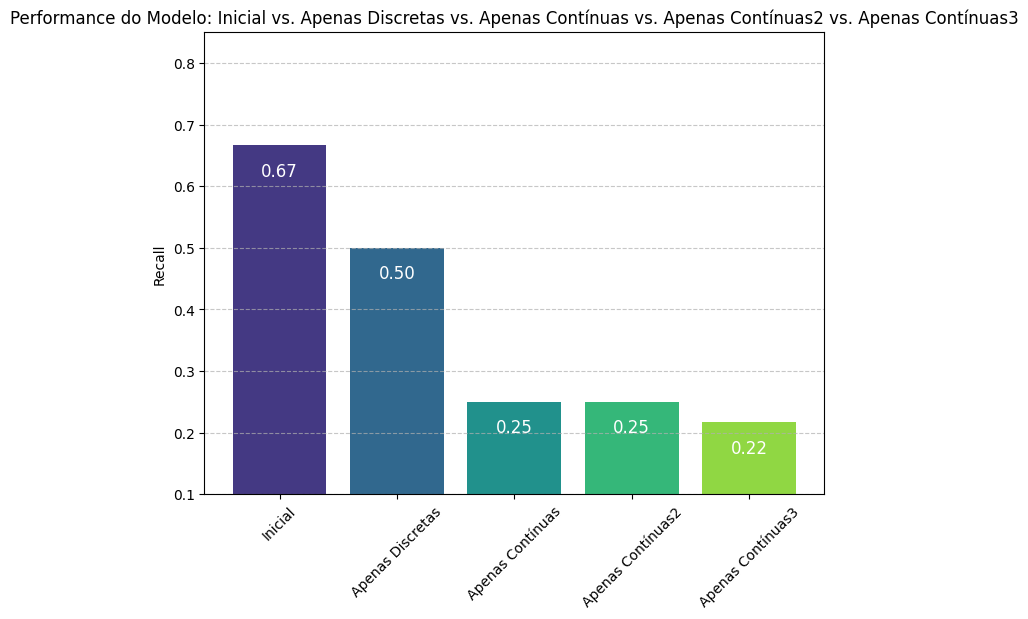

In [57]:
# Avaliação do modelo inicial
initial_performance = evaluate_model(y_test, y_pred1)
if initial_performance is not None:
    accuracy_inicial = initial_performance[0]
    print(f'Accuracy Inicial: {accuracy_inicial}')
else:
    print('Erro: Initial performance retornou None.')

def evaluate_model(y_true, y_pred):
    print(f'Accuracy: {accuracy_score(y_true, y_pred)}')
    print(f'Precision: {precision_score(y_true, y_pred)}')
    print(f'Recall: {recall_score(y_true, y_pred)}')
    print(f'F1 Score: {f1_score(y_true, y_pred)}')

# Performance usando apenas variáveis discretas
model3 = CustomBayesClassifier(discrete_cols, None, None)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print("Performance usando apenas variáveis discretas:")
print(evaluate_model(y_test, y_pred3))
accuracy_discrete = recall_score(y_test, y_pred3)

# Performance usando apenas variáveis contínuas
model4 = CustomBayesClassifier(None, continuous_normal_cols, continuous_non_normal_cols)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print("Performance usando apenas variáveis contínuas:",)
print(evaluate_model(y_test, y_pred4))
accuracy_continuous = recall_score(y_test, y_pred4)

# Performance usando apenas variáveis contínuas modelo 2
model5 = GeneralHybridBayesClassifier(None, continuous_cols)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
print("Performance usando apenas variáveis contínuas modelo 2:",)
print(evaluate_model(y_test, y_pred5))
accuracy_continuous2 = recall_score(y_test, y_pred5)


# Performance usando apenas variáveis contínuas modelo 3
model6 = CustomBayesClassifier(None, continuous_cols, None)
model6.fit(X_train, y_train)
y_pred6 = model6.predict(X_test)
print("Performance usando apenas variáveis contínuas modelo 2:",)
print(evaluate_model(y_test, y_pred6))
accuracy_continuous3 = recall_score(y_test, y_pred6)

# Avaliar performance
def evaluate_model(y_true, y_pred):
    print(f'Accuracy: {accuracy_score(y_true, y_pred)}')
    print(f'Precision: {precision_score(y_true, y_pred)}')
    print(f'Recall: {recall_score(y_true, y_pred)}')
    print(f'F1 Score: {f1_score(y_true, y_pred)}')


# Criar o gráfico de barras
labels = ['Inicial', 'Apenas Discretas', 'Apenas Contínuas', 'Apenas Contínuas2', 'Apenas Contínuas3']
recall = [0.66666666, accuracy_discrete, accuracy_continuous, accuracy_continuous2, accuracy_continuous3]
#cores viridis
colors = sns.color_palette('viridis', n_colors=len(labels))

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, recall, color=colors)

# Adicionar texto nas barras com os valores
for bar, recalls in zip(bars, recall):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{recalls:.2f}', ha='center', color='white', fontsize=12)

plt.ylim(0.1, 0.85)  # Limitar o eixo y para melhor visualização das diferenças
plt.ylabel('Recall')
plt.title('Performance do Modelo: Inicial vs. Apenas Discretas vs. Apenas Contínuas vs. Apenas Contínuas2 vs. Apenas Contínuas3')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# colocar labels na diagonal
plt.xticks(rotation=45)

plt.show()